<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Постановка задачи.**

Интегральное уравнение Фредгольма 2-го рода:

$$U(x) + \int \limits_{\Sigma} K(x, y) U(y) dy = f(x); x=(x_1, x_2), y=(y_1, y_2) \in ℝ^2,$$

где $K(x, y) = \frac{1}{4 \cdot \pi \cdot |x - y|} = \frac{1}{4 \cdot \pi \cdot \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}},$

$f(x) = sin(x_1) + cos(x_2)$

Квадратная область $\Sigma = \bigcup \limits_{i=1}^{N^2} \sigma_i$:

$$\Sigma : \{ (x_1, x_2) \in ℝ^2 | x_1 \in [x^c_1 - \frac{H}{2}; x^c_1 + \frac{H}{2}], x_2 \in [x^c_2 - \frac{H}{2}; x^c_2 + \frac{H}{2}] \},$$

где $(x^c_1, x^c_2)$ точка центра квадрата $\sigma_i$ ($x^i_c = (x^i_1, x^i_2) \in \sigma_i$),

$H$ - ширина рассматриваемой области

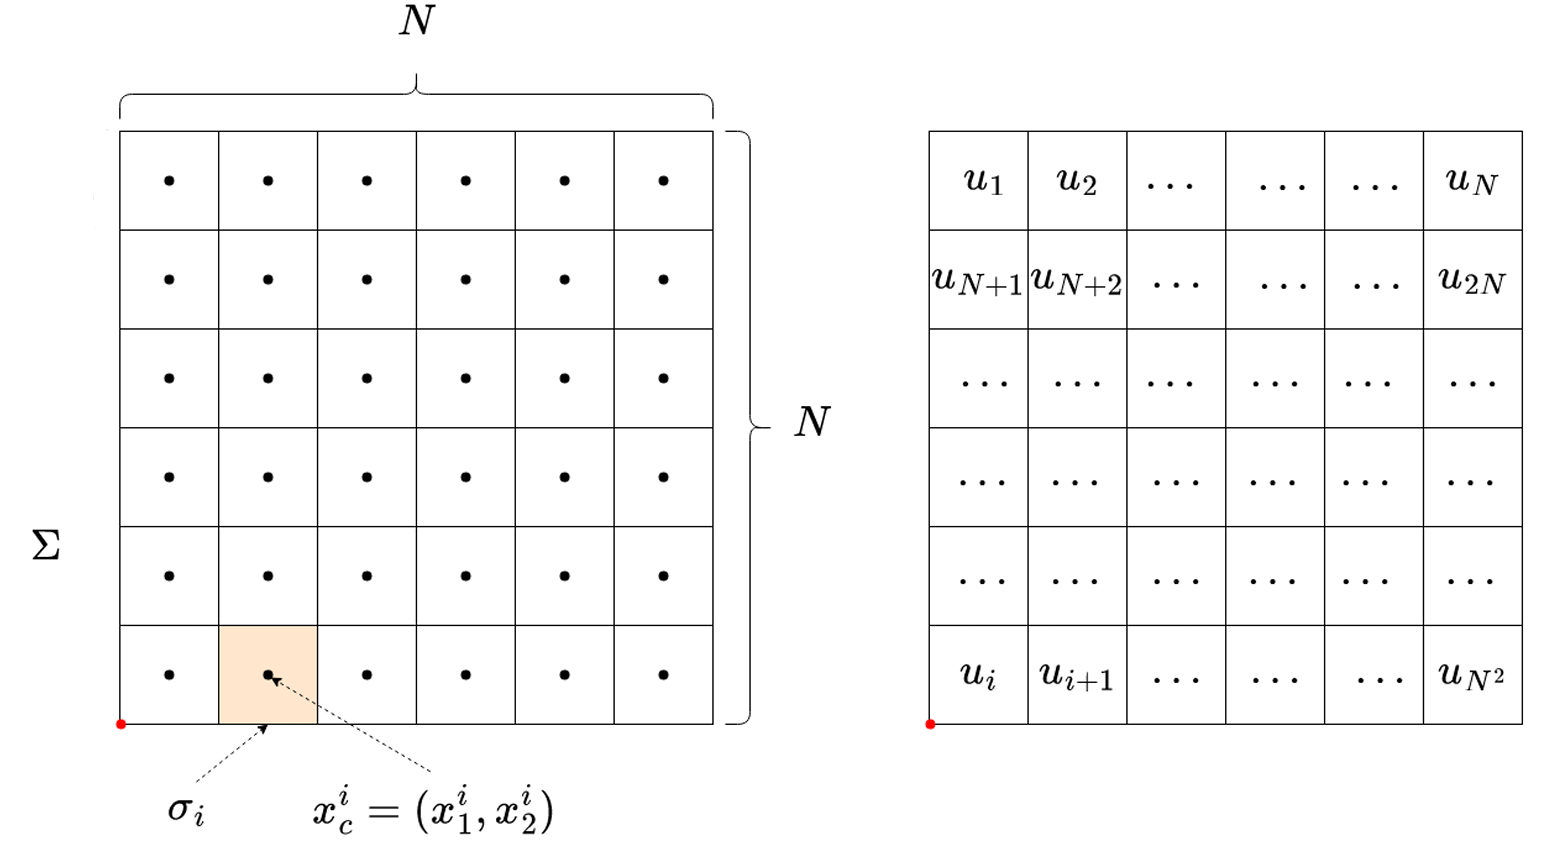

Применим метод коллокаций:

$$U_i + \sum^{N^2}_{j=1, j \neq i} K(x_i, x_j) \cdot U_j \cdot h^2 = sin(x^i_1) + cos(x^i_2); i=j=1,_\cdots,N^2$$

А теперь из этого составляем СЛАУ, которую нужно решить относительно вектора $u$:

$$Au = f,$$

где $A = E + K \cdot (\frac{H}{N})^2,$

$f = f_i = sin(x^i_1) + cos(x^j_2)$

Ядро задаём вот так:
\begin{equation*}
    K = k_{ij} = \begin{cases}
        0, i = j
        \\
        \frac{1}{4 \cdot \pi \cdot |x_i - x_j|}, i \neq j
    \end{cases}
\end{equation*}

# **Программная реализация.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def x(i, H):
    return i * H + H / 2


def y(j, H):
    return j * H + H / 2


def SIGMA_area(X, Y, N):
    SIGMA_arr = []
    for i in range(N):
        for j in range(N):
            SIGMA_arr.append(complex(X[i], Y[j]))

    return SIGMA_arr


def K(SIGMA):
    l_S = len(SIGMA)
    K_arr = []
    for i in range(l_S):
        for j in range(l_S):
            if i == j:
                K_arr.append(0)
            else:
                K_arr.append(1 / (4 * np.pi * abs(SIGMA[i] - SIGMA[j])))

    return K_arr


def f_nums(X, Y, N):
    f_arr = []
    for i in range(N):
        for j in range(N):
            f_arr.append(np.sin(X[i]) + np.cos(Y[j]))

    return f_arr

In [ ]:
def heatmap2d(arr2D, N):
    plt.imshow(arr2D, interpolation='bilinear', cmap='viridis')
    plt.contourf(arr2D, levels=N)
    plt.title(f'Визуализация решения в 2D')
    plt.show()


def heatmap3d(X, Y, arr2d):
    ax = plt.axes(projection="3d")
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, arr2d, cmap='viridis') # масштаб будет иной, но на график не повлияет
    plt.title(f'Визуализация решения в 3D')
    plt.show()

In [ ]:
def gradient_descent(u_old, A, f, r, eps):
    steps = 1

    AT = np.matrix.transpose(A)
    AT_r = AT @ r
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_new = u_old - (up / down) * (AT @ r)

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new
            r = A @ u_old - f
            AT_r = AT @ r
            up = round(np.linalg.norm(AT_r) ** 2, 30)
            down = round(np.linalg.norm(A @ AT_r) ** 2, 30)

            if down != 0:
                u_new = u_old - (up / down) * (AT @ r)

                norm_diff_u = np.linalg.norm(u_new - u_old)
            else:
                break
    else:
        pass

    return u_new, steps

In [ ]:
def double_step_gradient_descent(u_old, A, f, r, eps):
    steps = 1

    # Cтартовые значения u и r
    u_0 = u_old
    r_0 = r

    # Подготовка к первому шагу
    AT = np.matrix.transpose(A)
    AT_r = AT @ r_0
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_1 = u_0 - (up / down) * (AT @ r_0) # делаем шаг для определения u_1

    # После определения u_1 переходим к основному шагу алгоритма
    r_1 = A @ u_1 - f
    AT_r = AT @ r_1

    Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                    [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
    Vec = np.array([0.,
                    np.linalg.norm(AT_r) ** 2])
    Ans = np.linalg.pinv(Mat) @ Vec
    alpha = Ans[0]
    gamma = Ans[1]

    u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r # второй шаг (основной)

    norm_diff_u = np.linalg.norm(u_2 - u_1)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_0 = u_1
            u_1 = u_2

            r_0 = r_1
            r_1 = A @ u_1 - f
            AT_r = AT @ r_1

            Mat = np.array([[np.linalg.norm(r_1 - r_0) ** 2, np.linalg.norm(AT_r) ** 2],
                            [np.linalg.norm(AT_r) ** 2, np.linalg.norm(A @ AT_r) ** 2]])
            Vec = np.array([0.,
                            np.linalg.norm(AT_r) ** 2])
            Ans = np.linalg.pinv(Mat) @ Vec
            alpha = Ans[0]
            gamma = Ans[1]

            u_2 = u_1 - alpha * (u_1 - u_0) - gamma * AT_r

            norm_diff_u = np.linalg.norm(u_2 - u_1)
    else:
        pass

    return u_2, steps

In [ ]:
def biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps):
    steps = 1

    # Подготовка
    r_old = r
    rho_old = rho
    alpha_old = alpha
    omega_old = omega
    v_old = v
    p_old = p
    s_old = s

    # Итерации
    rho_new = r_tilda.T @ r_old
    beta = (rho_new / rho_old) * (alpha_old / omega_old)
    p_new = r_old + beta * (p_old - omega_old * v_old)
    v_new = A @ p_new
    alpha_new = rho_new / (r_tilda.T @ v_new)
    s_new = r_old - alpha_new * v_new
    if not(np.any(s_new)):
        s_new = np.array([[0.0000205]] * N)
    t = A @ s_new
    omega_new = (t.T @ s_new) / (np.sum(t ** 2))
    u_new = u_old + omega_new * s_new + alpha_new * p_new
    r_new = s_new - omega_new * t

    # Критерий останова
    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            # Подготовка
            r_old = r_new
            rho_old = rho_new
            alpha_old = alpha_new
            omega_old = omega_new
            v_old = v_new
            p_old = p_new
            s_old = s_new

            # Итерации
            rho_new = r_tilda.T @ r_old
            beta = (rho_new / rho_old) * (alpha_old / omega_old)
            p_new = r_old + beta * (p_old - omega_old * v_old)
            v_new = A @ p_new
            alpha_new = rho_new / (r_tilda.T @ v_new)
            s_new = r_old - alpha_new * v_new
            if not(np.any(s_new)):
                s_new = np.array([[0.0000205]] * N)
            t = A @ s_new
            omega_new = (t.T @ s_new) / (np.sum(t ** 2))
            u_new = u_old + omega_new * s_new + alpha_new * p_new
            r_new = s_new - omega_new * t

            # Критерий останова
            norm_diff_u = np.linalg.norm(u_new - u_old)
    else:
        pass

    return u_new, steps

## **(N = 10, H = 6)**

In [ ]:
N = 10
H = 6

X = [x(i, H) for i in range(N)]
Y = [y(j, H) for j in range(N)]

# Определение области СИГМА
SIGMA = SIGMA_area(X, Y, N)

# Определение вектора f
f = np.array(f_nums(X, Y, N)).reshape(N ** 2, 1)

# Определение ядра
Kernel_matrix = np.array(K(SIGMA)).reshape(N ** 2, N ** 2)

# Определение матрицы А
A = np.eye(N ** 2) + Kernel_matrix * (H / N) ** 2

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N ** 2)

# Критерий останова
eps = 1e-10

### **Градиентный спуск**

Число шагов: 12


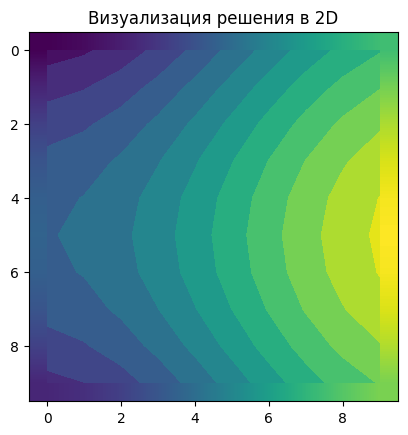

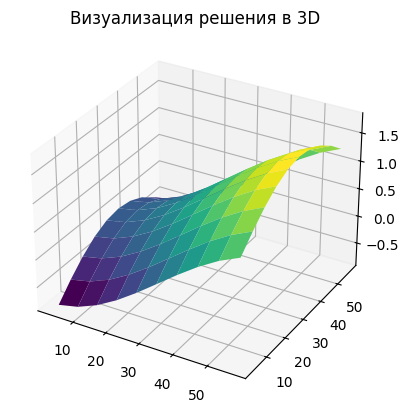

In [ ]:
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_GD}")

u_GD = u_GD.reshape(N, N)

heatmap2d(u_GD, N)

heatmap3d(X, Y, u_GD)

### **Двухшаговый градиентный спуск**

Число шагов: 6


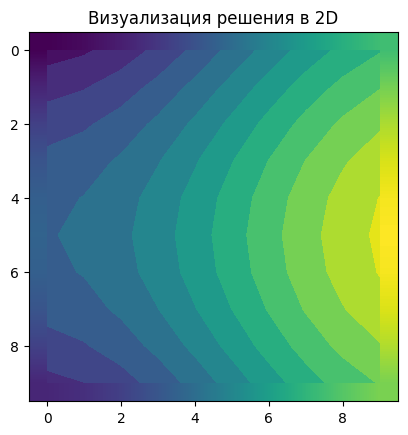

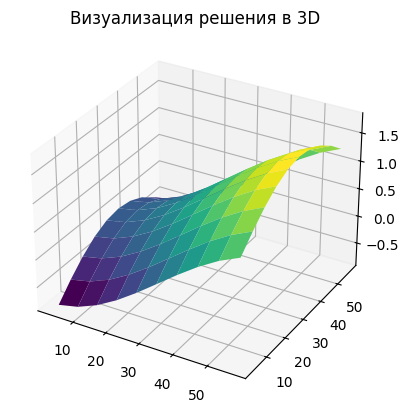

In [ ]:
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_DSGD}")

u_DSGD = u_DSGD.reshape(N, N)

heatmap2d(u_DSGD, N)

heatmap3d(X, Y, u_DSGD)

### **Стабилизированный метод бисопряжённых градиентов**

Число шагов: 4


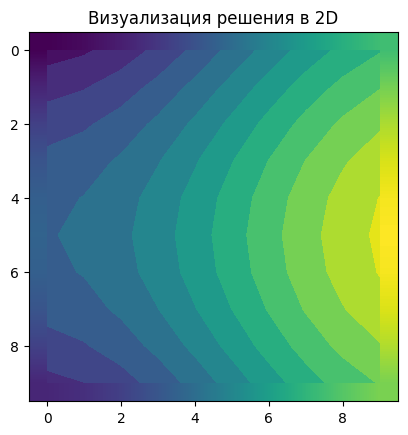

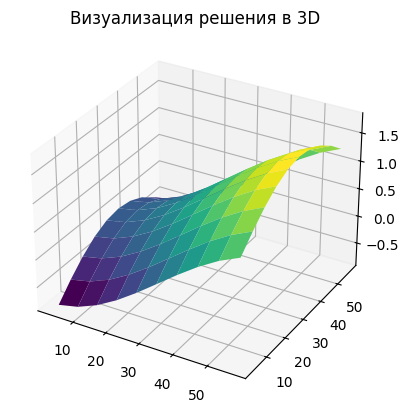

In [ ]:
r = f - A @ u_old
r_tilda = r
rho = 1
alpha = 1
omega = 1
v = np.array([[0.]] * N ** 2)
p = np.array([[0.]] * N ** 2)
s = np.array([[0.]] * N ** 2)

u_BGSM, count_steps_BGSM = biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps)

print(f"Число шагов: {count_steps_BGSM}")

u_BGSM = u_BGSM.reshape(N, N)

heatmap2d(u_BGSM, N)

heatmap3d(X, Y, u_BGSM)

## **(N = 20, H = 6)**

In [ ]:
N = 20
H = 6

X = [x(i, H) for i in range(N)]
Y = [y(j, H) for j in range(N)]

# Определение области СИГМА
SIGMA = SIGMA_area(X, Y, N)

# Определение вектора f
f = np.array(f_nums(X, Y, N)).reshape(N ** 2, 1)

# Определение ядра
Kernel_matrix = np.array(K(SIGMA)).reshape(N ** 2, N ** 2)

# Определение матрицы А
A = np.eye(N ** 2) + Kernel_matrix * (H / N) ** 2

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N ** 2)

# Критерий останова
eps = 1e-10

### **Градиентный спуск**

Число шагов: 9


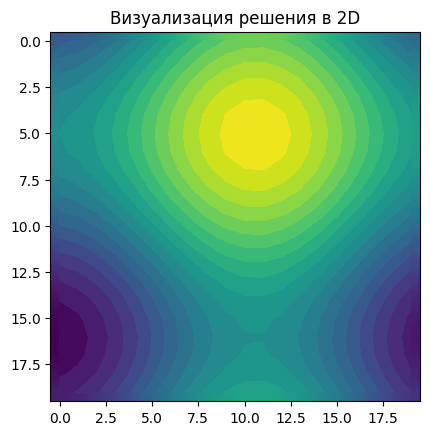

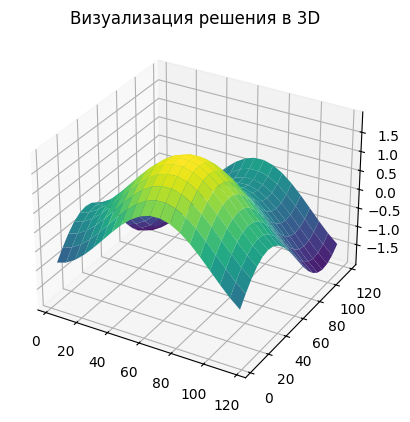

In [ ]:
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_GD}")

u_GD = u_GD.reshape(N, N)

heatmap2d(u_GD, N)

heatmap3d(X, Y, u_GD)

### **Двухшаговый градиентный спуск**

Число шагов: 6


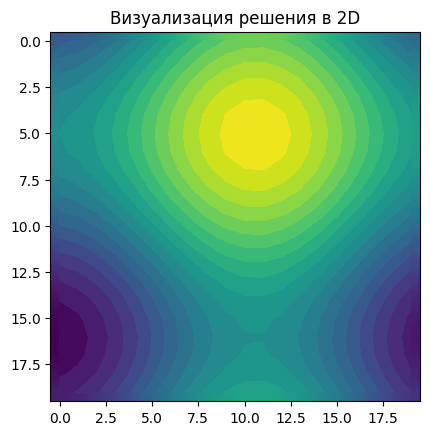

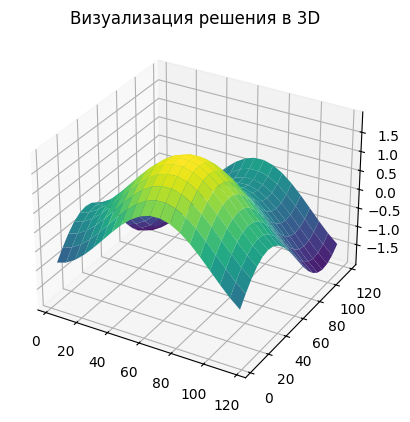

In [ ]:
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_DSGD}")

u_DSGD = u_DSGD.reshape(N, N)

heatmap2d(u_DSGD, N)

heatmap3d(X, Y, u_DSGD)

### **Стабилизированный метод бисопряжённых градиентов**

Число шагов: 4


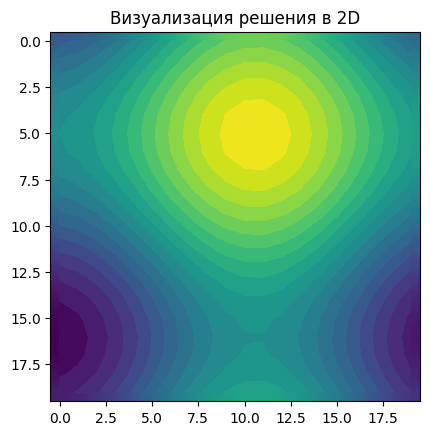

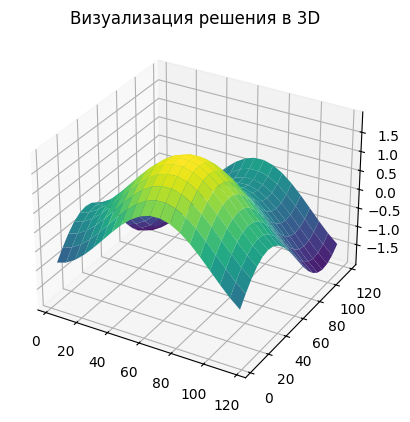

In [ ]:
r = f - A @ u_old
r_tilda = r
rho = 1
alpha = 1
omega = 1
v = np.array([[0.]] * N ** 2)
p = np.array([[0.]] * N ** 2)
s = np.array([[0.]] * N ** 2)

u_BGSM, count_steps_BGSM = biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps)

print(f"Число шагов: {count_steps_BGSM}")

u_BGSM = u_BGSM.reshape(N, N)

heatmap2d(u_BGSM, N)

heatmap3d(X, Y, u_BGSM)

## **(N = 30, H = 6)**

In [ ]:
N = 30
H = 6

X = [x(i, H) for i in range(N)]
Y = [y(j, H) for j in range(N)]

# Определение области СИГМА
SIGMA = SIGMA_area(X, Y, N)

# Определение вектора f
f = np.array(f_nums(X, Y, N)).reshape(N ** 2, 1)

# Определение ядра
Kernel_matrix = np.array(K(SIGMA)).reshape(N ** 2, N ** 2)

# Определение матрицы А
A = np.eye(N ** 2) + Kernel_matrix * (H / N) ** 2

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N ** 2)

# Критерий останова
eps = 1e-10

### **Градиентный спуск**

Число шагов: 8


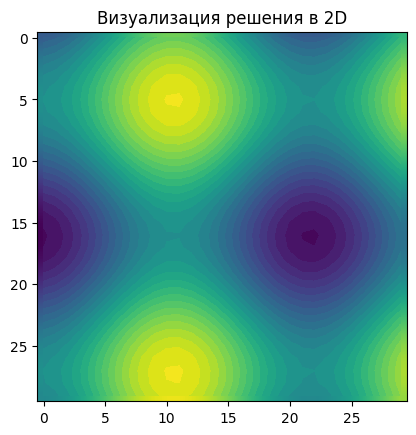

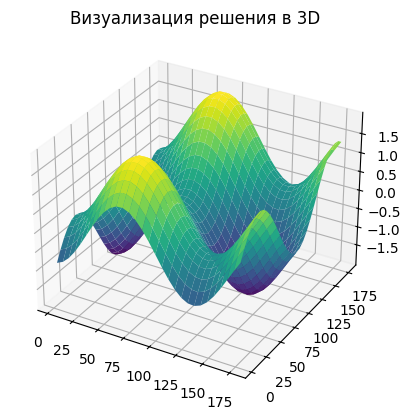

In [ ]:
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_GD}")

u_GD = u_GD.reshape(N, N)

heatmap2d(u_GD, N)

heatmap3d(X, Y, u_GD)

### **Двухшаговый градиентный спуск**

Число шагов: 6


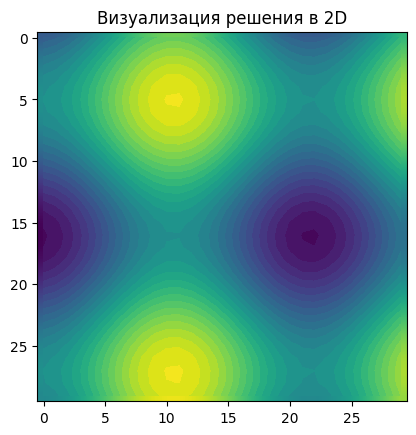

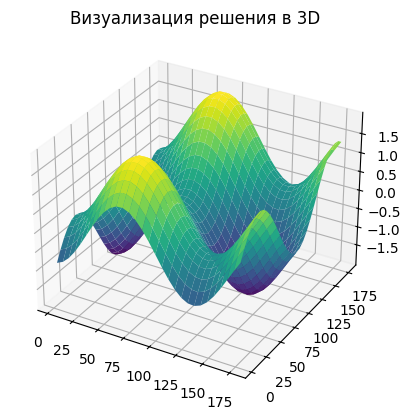

In [ ]:
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_DSGD}")

u_DSGD = u_DSGD.reshape(N, N)

heatmap2d(u_DSGD, N)

heatmap3d(X, Y, u_DSGD)

### **Стабилизированный метод бисопряжённых градиентов**

Число шагов: 4


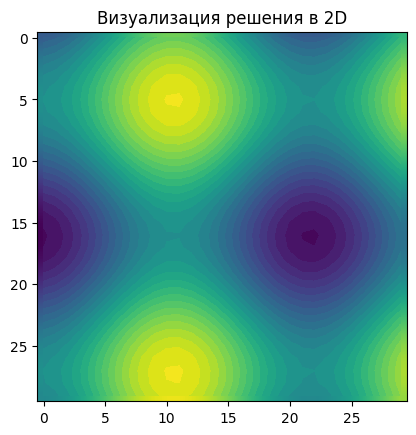

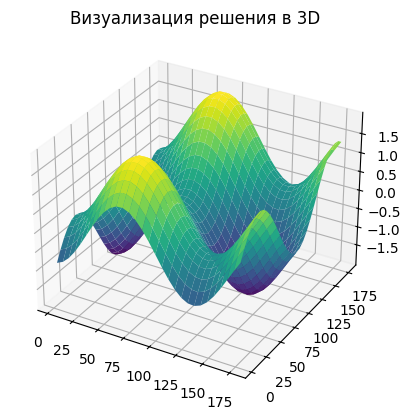

In [ ]:
r = f - A @ u_old
r_tilda = r
rho = 1
alpha = 1
omega = 1
v = np.array([[0.]] * N ** 2)
p = np.array([[0.]] * N ** 2)
s = np.array([[0.]] * N ** 2)

u_BGSM, count_steps_BGSM = biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps)

print(f"Число шагов: {count_steps_BGSM}")

u_BGSM = u_BGSM.reshape(N, N)

heatmap2d(u_BGSM, N)

heatmap3d(X, Y, u_BGSM)

## **(N = 40, H = 6)**

In [ ]:
N = 40
H = 6

X = [x(i, H) for i in range(N)]
Y = [y(j, H) for j in range(N)]

# Определение области СИГМА
SIGMA = SIGMA_area(X, Y, N)

# Определение вектора f
f = np.array(f_nums(X, Y, N)).reshape(N ** 2, 1)

# Определение ядра
Kernel_matrix = np.array(K(SIGMA)).reshape(N ** 2, N ** 2)

# Определение матрицы А
A = np.eye(N ** 2) + Kernel_matrix * (H / N) ** 2

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N ** 2)

# Критерий останова
eps = 1e-10

### **Градиентный спуск**

Число шагов: 7


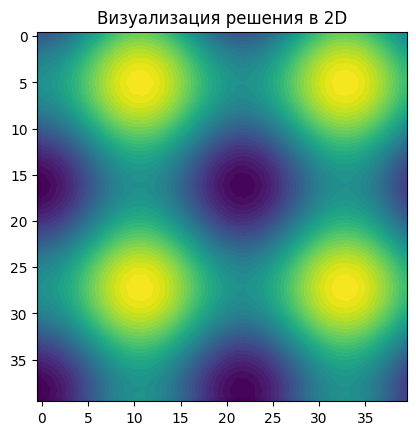

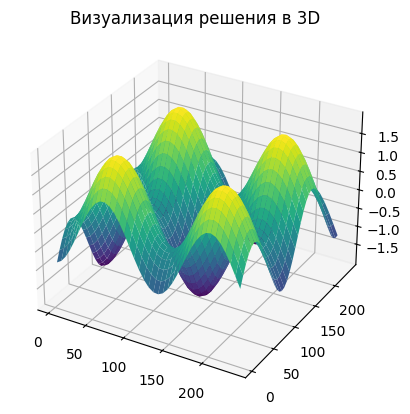

In [ ]:
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_GD}")

u_GD = u_GD.reshape(N, N)

heatmap2d(u_GD, N)

heatmap3d(X, Y, u_GD)

### **Двухшаговый градиентный спуск**

Число шагов: 5


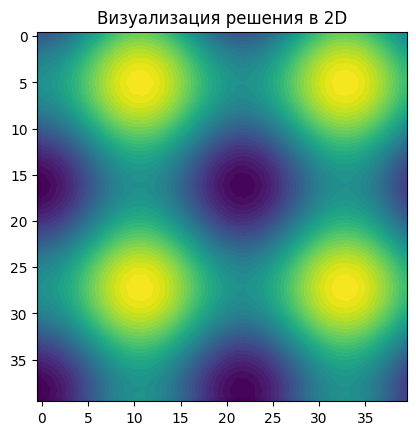

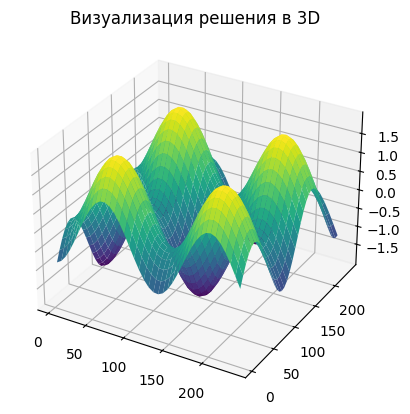

In [ ]:
r = A @ u_old - f

u_DSGD, count_steps_DSGD = double_step_gradient_descent(u_old, A, f, r, eps)

print(f"Число шагов: {count_steps_DSGD}")

u_DSGD = u_DSGD.reshape(N, N)

heatmap2d(u_DSGD, N)

heatmap3d(X, Y, u_DSGD)

### **Стабилизированный метод бисопряжённых градиентов**

Число шагов: 4


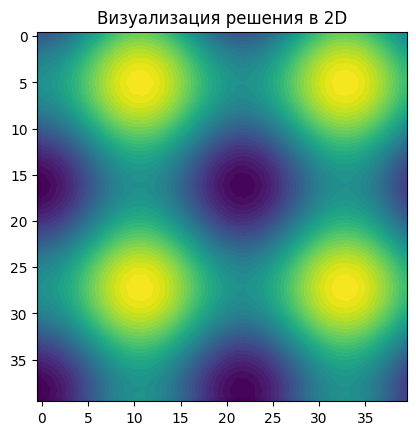

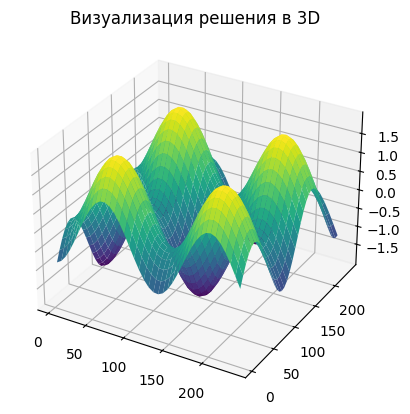

In [ ]:
r = f - A @ u_old
r_tilda = r
rho = 1
alpha = 1
omega = 1
v = np.array([[0.]] * N ** 2)
p = np.array([[0.]] * N ** 2)
s = np.array([[0.]] * N ** 2)

u_BGSM, count_steps_BGSM = biconjugate_gradient_stabilized_method(u_old, A, f, r, r_tilda, rho, alpha, omega, v, p, s, eps)

print(f"Число шагов: {count_steps_BGSM}")

u_BGSM = u_BGSM.reshape(N, N)

heatmap2d(u_BGSM, N)

heatmap3d(X, Y, u_BGSM)